<a href="https://colab.research.google.com/github/GauravPatel89/EVA-Track3-Assignments/blob/master/Session5/Session5_L2Corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import keras

import keras

Using TensorFlow backend.


Import the different packages to use in our code.

Last line imports the MNIST dataset

In [0]:
#Import different packages to use in our code

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint,Callback
from keras.preprocessing.image import ImageDataGenerator

#Import MNIST dataset to use in our code
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Load MNIST dataset

X_train - input training data

y_train - training outputs corresponding to X_train

X_test - input testing data

y_test - testing outputs corresponding to X_test

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

XTest = X_test   # make a copy of X_test as we will be modifying X_test

11493376/11490434 [==============================] - 1s 0us/step


Change the dimensionality of X_train and X_test from 60000x28x28 to 60000x28x28x1
We are adding one more level of dimension to the input. 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Image standardization (Divide all the pixel values by max pixel values)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Convert training and test output from simple class number to 'one hot encoding'. In this encoding we have as many bits as the number of classes.We have binary '1' for bit number corresponding to the class of the input. For other classes we have '0'.

eg. '5' == '0 0 0 0 1 0 0 0 0 0' ; '10' == '0 0 0 0 0 0 0 0 0 1'

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
# Image Normalization 
# use keras ImageDataGenerator. 
# 'featurewise_center' function subtracts batch mean from all the batch images to make it zero mean
# 'featurewise_std_normalization' function divides batch images with std of batch. 

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# Fit dataGenerator to X_train. This calculates stats for X_train.
datagen.fit(X_train)

# Verify Data normalization
print('Before Normalization')
print('Training Data Mean: {}  Std: {}'.format(datagen.mean,datagen.std))

print('After Normalization')
temp_iterator = datagen.flow(X_train, Y_train, batch_size=len(X_train))
batchX, batchy = temp_iterator.next()
print('Training Data Mean: {}  Std: {}'.format(batchX.mean(),batchX.std()))



Before Normalization
Training Data Mean: [[[0.13066062]]]  Std: [[[0.30810776]]]
After Normalization
Training Data Mean: -4.930901695843204e-07  Std: 0.9999963045120239


In [0]:
print(batchX.shape)

(60000, 28, 28, 1)


In [8]:
# Create a model
model = Sequential()
                                                                              # RF = 1x1    i/p = 28x28x1     
model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1)))  # RF = 3x3    i/p = 28x28x1  kernel = (3x3x1)x8   o/p = 26x26x8
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # ReLU activation
model.add(Dropout(0.05))             # DropOut 5%

model.add(Convolution2D(12, 3, 3))                        # RF = 5x5    i/p = 26x26x1  kernel = (3x3x8)x12  o/p = 24x24x12
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # ReLU activation
model.add(Dropout(0.08))             # DropOut 8%

# 1x1 Conv
model.add(Convolution2D(8, 1, activation='relu'))                            # RF = 5x5    i/p = 24x24x12 kernel = (1x1x12)x8  o/p = 24x24x8
# 2x2 MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))                                    # RF = 10x10  i/p = 24x24x8  kernel = MaxPool2x2  o/p = 12x12x8

model.add(Convolution2D(12, 3, 3))                        # RF = 12x12  i/p = 12x12x8  kernel = (3x3x8)x12  o/p = 10x10x12
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # ReLU activation
model.add(Dropout(0.08))             # DropOut 8%

model.add(Convolution2D(12, 3, 3))                        # RF = 14x14  i/p = 10x10x12 kernel = (3x3x12)x12 o/p = 8x8x12
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # ReLU activation
model.add(Dropout(0.08))             # DropOut 8%

model.add(Convolution2D(12, 3, 3))                        # RF = 16x16  i/p =  8x8x12  kernel = (3x3x12)x12 o/p = 6x6x12
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # ReLU activation
model.add(Dropout(0.08))             # DropOut 8%

# 1x1 Conv
model.add(Convolution2D(12, 1))                           # RF = 16x16  i/p = 6x6x12   kernel = (1x1x12)x12 o/p = 6x6x12
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # ReLU activation
model.add(Dropout(0.08))             # DropOut 8%

model.add(Convolution2D(10, 6, 6))                                           # RF = 21x21  i/p = 6x6x12   kernel = (6x6x12)x10 o/p = 1x1x10

model.add(Flatten())                                                         # flatten the 1x1x10 array into 10x1 array
model.add(Activation('softmax'))                                             # apply the softmax function to obtain classification weights

model.summary()   #Show model information

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3))`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        876       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 12)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`


In [9]:
# Setup checkpoint callback

from google.colab import drive
from keras.callbacks import ModelCheckpoint

# mount google drive to save best model 
drive.mount('/content/gdrive')


#fileName = '/content/gdrive/My Drive/TSAI/Session5/Model-{epoch:02d}-{val_acc:.4f}.hdf5'
# File name of best model
fileName = '/content/gdrive/My Drive/TSAI/Session5/Best-Model2.hdf5'
# Monitor Validation accuracy and each time accuracy improves, overwrite the model in 'fileName' 
checkpoint = ModelCheckpoint(fileName,monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Define custom loss function in this code block

import keras.backend as K
def custom_Loss(BatchSize,lamda):
  
  def L2Norm_Added_Loss(y_true,y_pred): 
    
    # Calculate L2 norm for given Model Layers
    def L2_From_Layers(modelLayers):
      numOfWts = 0
      wtSqSum = 0
      # Traverse each layer in the model
      for layer in modelLayers:
        # traverse each array of the layer
        for arr in (layer.get_weights()):     
          wtSqSum += np.sum(np.sum(np.square(arr)))       # sum of squares of all the weights
          numOfWts += arr.size                            # calculate number of weights
      print(y_true.shape[0])
      L2Norm = wtSqSum / (2*BatchSize)                     # Calculate L2 Norm according to equation
      return L2Norm
    
    # we add L2 Norm to crossentropy loss to define new loss function
    totalLoss = K.categorical_crossentropy(y_true,y_pred) + lamda * L2_From_Layers(model.layers)
    #totalLoss = lamda * L2_From_Layers(model.layers)
    return totalLoss

  return L2Norm_Added_Loss

In [17]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# define learning rate scheduler. It varies learning rate with epoch value
def scheduler(epoch, lr):
  return round(0.009 * 1/(1 + 0.9 * epoch), 10)

BS=128

model.compile(loss=custom_Loss(BS,0.03), optimizer=Adam(lr=0.009), metrics=['accuracy'])


# Define how should ImageDataGenerator provide training batch and test batch with defined image augmentation

train_iterator = datagen.flow(X_train, Y_train, batch_size = BS,shuffle=True)
test_iterator = datagen.flow(X_test, Y_test, batch_size=len(X_test),shuffle=False)

#Train the model for 40 epochs with batch generated by ImageDataGenrator

#model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
model.fit_generator(train_iterator, steps_per_epoch=(len(X_train)//BS), epochs=40, verbose=1, validation_data = test_iterator, validation_steps = 1,
                    callbacks=[LearningRateScheduler(scheduler, verbose=1),checkpoint])

?
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.009.
468/468 [==============================] - 12s 26ms/step - loss: 0.2022 - acc: 0.9436 - val_loss: 0.0932 - val_acc: 0.9797

Epoch 00001: val_acc improved from -inf to 0.97970, saving model to /content/gdrive/My Drive/TSAI/Session5/Best-Model2.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0047368421.
468/468 [==============================] - 6s 14ms/step - loss: 0.0847 - acc: 0.9811 - val_loss: 0.0654 - val_acc: 0.9868

Epoch 00002: val_acc improved from 0.97970 to 0.98680, saving model to /content/gdrive/My Drive/TSAI/Session5/Best-Model2.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0032142857.
468/468 [==============================] - 7s 14ms/step - loss: 0.0727 - acc: 0.9845 - val_loss: 0.0629 - val_acc: 0.9881

Epoch 00003: val_acc improved from 0.98680 to 0.98810, saving model to /content/gdrive/My Drive/TSAI/Session5/Best-Model2.hdf5
E

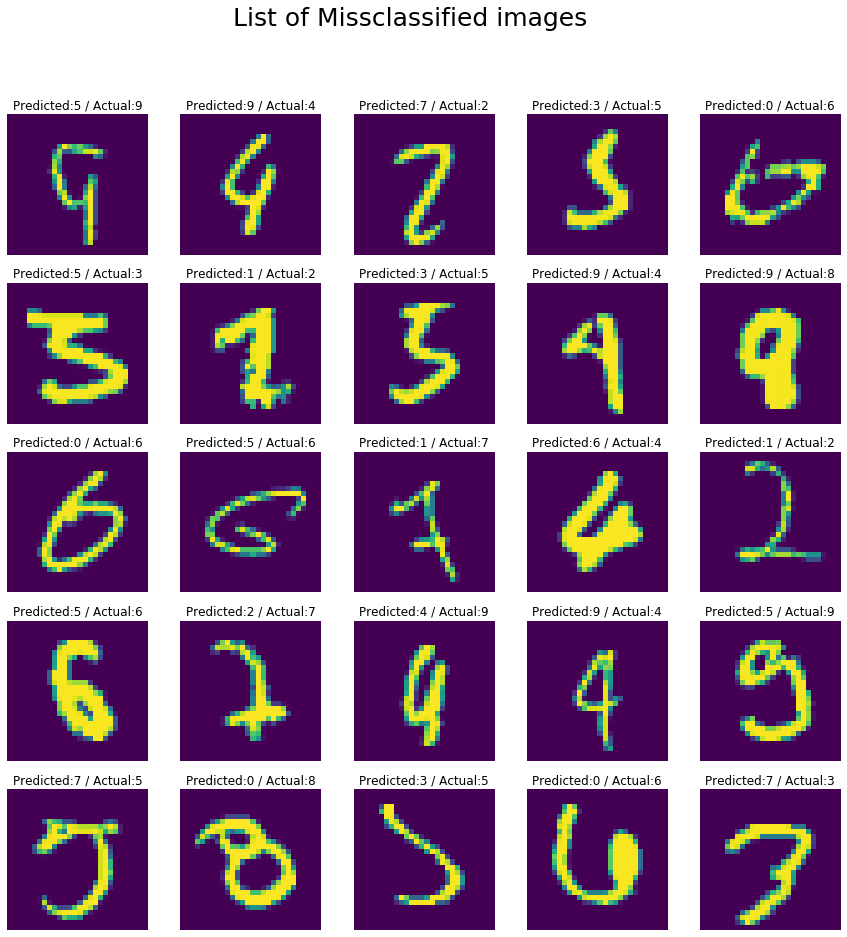

In [22]:
import matplotlib.pyplot as plt

# Load the best model saved during the training
model.load_weights("/content/gdrive/My Drive/TSAI/Session5/Best-Model.hdf5")

# Generate an iterator to generated normalized testdata
test_iterator = datagen.flow(X_test, Y_test, batch_size=len(X_test),shuffle=False)

# Make pedictions for test data using the trained model
y_pred = model.predict_generator(test_iterator,steps=1)

# Get the actual class values from one hot encoded y_pred
predictedDigits = np.argmax(y_pred,axis =1)

# Set number of rows and columns for gallery of misclassified images
rows = 5
cols = 5

# Generate a rows x cols sized image grid 
f, axarr = plt.subplots(rows,cols)

i = 0
count = 0
while ((count < rows*cols) and (i < X_test.shape[0])):
       if(predictedDigits[i] != y_test[i]):
            axarr[count // rows][count % cols].imshow(XTest[i])
            axarr[count // rows][count % cols].set_title('Predicted:{} / Actual:{}'.format(predictedDigits[i],y_test[i]),fontsize=12)
            axarr[count // rows][count % cols].axis('off')
            count += 1
       
       i +=  1
             
    
f.subplots_adjust(hspace=0.2)    
f.suptitle('List of Missclassified images', fontsize=25)
f.set_size_inches(15,15)
    
    